# Árboles de Decisión de Clasificación

## Ejercicio Dataset flor Iris

### Paso 1: Cargar Librerías

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

### Paso 2: Cargar el Dataset

In [ ]:
db_iris = load_iris()

### Paso 3: Explorar los datos

In [ ]:
print(db_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(db_iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Paso 4: Convertir los datos en un dataframe

In [ ]:
data = pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
data['target'] = db_iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Paso 5: Graficar la Data

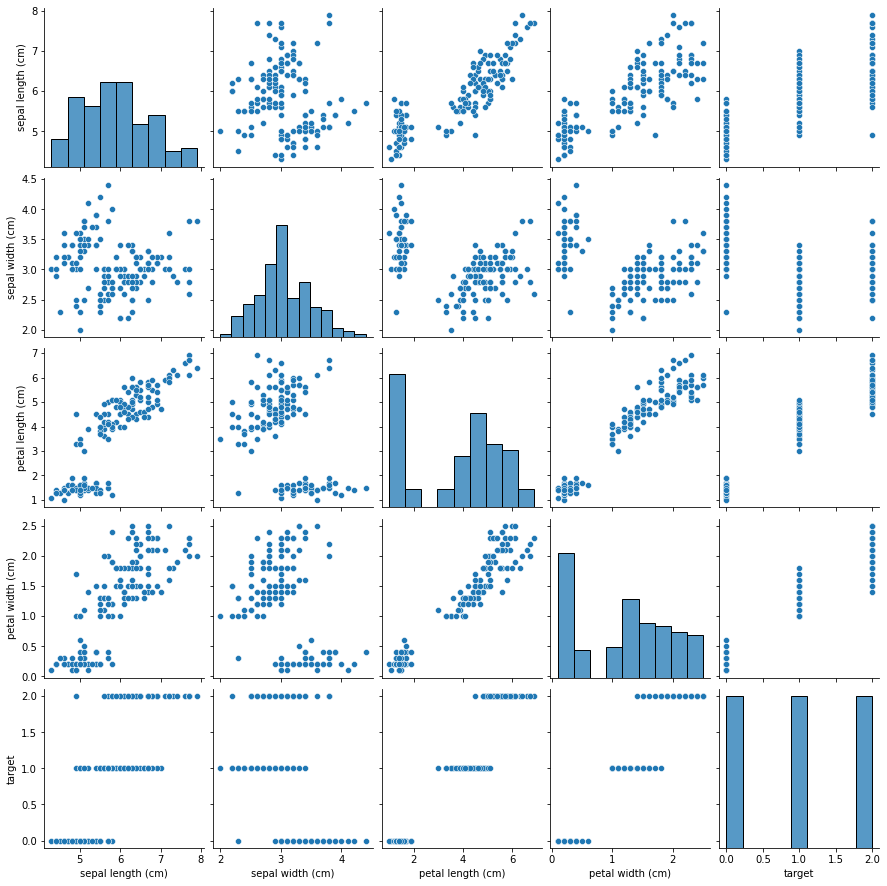

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

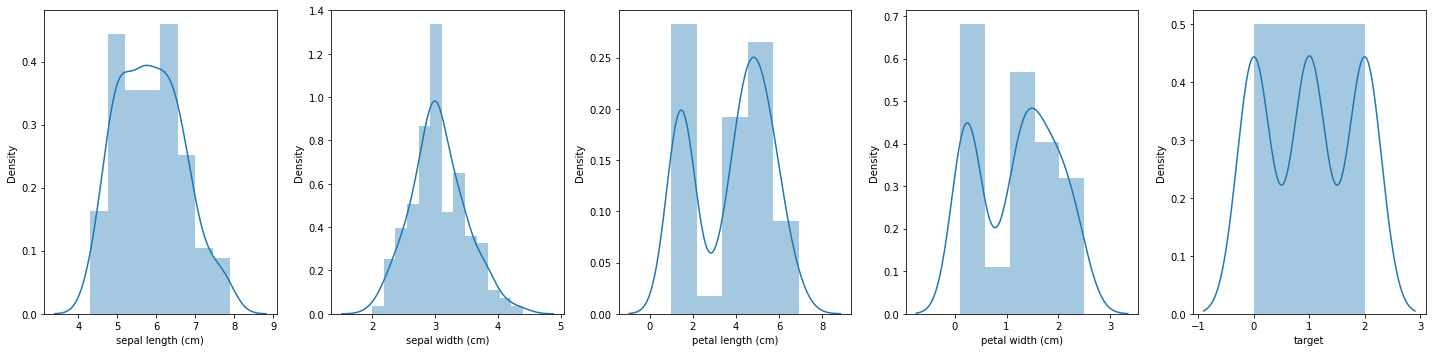

In [ ]:
cols = 5
fig, ax = plt.subplots(ncols=cols, figsize=(20,5))

col = data.columns
index = 0

for i in range(cols):
  sns.distplot(data[col[index]], ax=ax[i])
  index += 1

plt.tight_layout()

### Paso 6: Dividir el conjunto de datos

Al dividir los datos por defecto, la distribución es de 75% train y 25% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[db_iris.feature_names], data['target'], random_state=42)

### Paso 7: Instanciar un Árbol de Decisión

Se hace uso de un árbol de profundidad 3, es decir maximo 3 niveles

In [ ]:
arbol_clas = DecisionTreeClassifier(max_depth=3, random_state=0)

### Paso 8: Entrenar el algoritmo

In [ ]:
arbol_clas.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Paso 9: Predecir

In [ ]:
# Información del primer registro (X_test)
print(X_test.iloc[0])

# Verdadero resultado de la flor
print(y_test.iloc[0])

arbol_clas.predict(X_test.iloc[0].values.reshape(1,-1))

# Predicción para 10 registros
arbol_clas.predict(X_test[0:10])

sepal length (cm)    6.1
sepal width (cm)     2.8
petal length (cm)    4.7
petal width (cm)     1.2
Name: 73, dtype: float64
1


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

### Paso 10: Calcular la precisión del algoritmo

In [ ]:
accuracy = arbol_clas.score(X_test, y_test)
print(accuracy)

1.0


### Paso 11: Graficar el árbol

In [ ]:
class_names_list = list(['setosa', 'versicolor', 'virginica'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(arbol_clas, feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

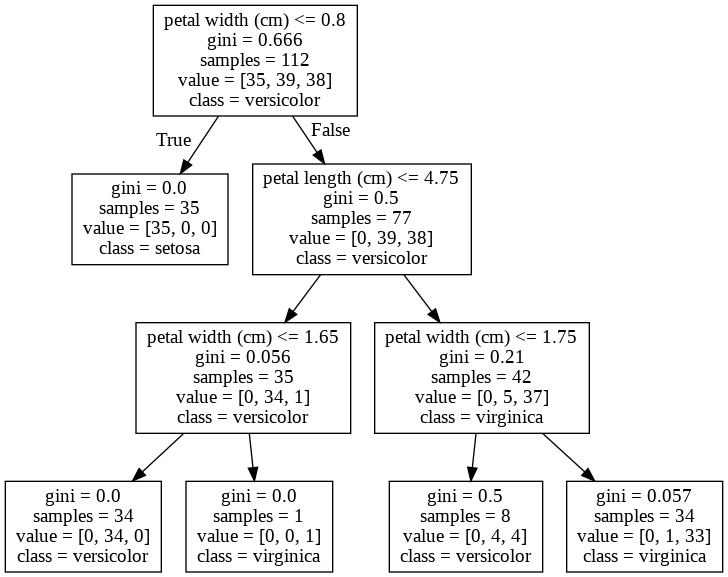

- Condición: Si es un nodo donde se toma alguna decisión
- gini: Medida de impureza (entropía)
- samples: Número de muestras que satisfacen las condiciones necesarias para llegar a este nodo
- value: Cuántas muestras de cada clase llegan a este nodo
- class: Qué clase se le asigna a las muestras que llegan a este nodo

### Paso 12: Conocer las características más importantes

Para crear el árbol, el algoritmo encuentra que unas características son más importantes que otras. 

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(arbol_clas.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False)
importances.head()

,feature,importance
3,petal width (cm),0.596
2,petal length (cm),0.404
0,sepal length (cm),0.000
1,sepal width (cm),0.000


### *Aclaración*: Mejorar el *Árbol*

En esta sección se aclara una forma para hallar cúal es la profundidad ideal para el árbol. 

In [ ]:
max_depth_lista = list(range(1, 6))

accuracy = []

for depth in max_depth_lista:
  arbol_clas = DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol_clas.fit(X_train, y_train)
  score = arbol_clas.score(X_test, y_test)
  accuracy.append(score)

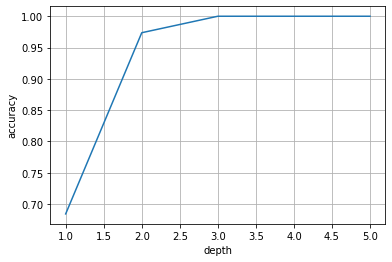

In [ ]:
plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

### *Nota*: Hiper-parámetros que ayudan a mejorar la creación del árbol

- max_depth: Profundidad máxima del árbol
- min_samples_split: Número mínimo de muestras necesarias antes de dividir el nodo. También se puede expresar en porcentaje.
- min_saples_leaf: Número mínimo de muestras que debe haber en un nodo final. También se puede expresar en porcentaje.
- max_leaf_nodes: número maximo de nodos finales

### Classification_report()

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test, y_pred=arbol_clas.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Ejercicio Dataset Titanic

### Cargar Librerías y Dataset

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
titanic = sns.load_dataset('titanic')

### Conocer la Data

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(titanic.keys())

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Mapa de calor para datos nulos

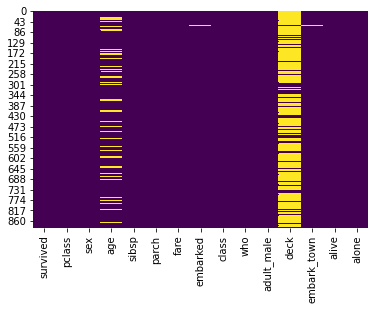

In [ ]:
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis")

### Graficar la Data

#### 1. Sobrevivientes Global

0    0.616162
1    0.383838
Name: survived, dtype: float64


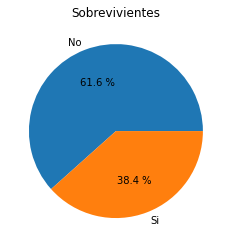

In [ ]:
datos = titanic.survived.value_counts(normalize=True)
print(datos)

plt.pie(datos, labels=['No','Si'], autopct='%0.1f %%')
plt.title('Sobrevivientes')
plt.show()

#### 2. Sobrevivientes por Género

female    0.681287
male      0.318713
Name: sex, dtype: float64


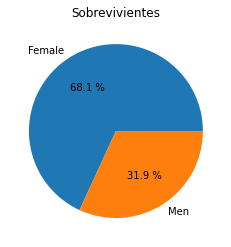

In [ ]:
datos = titanic.sex[titanic.survived == 1].value_counts(normalize = True)
print(datos)

plt.pie(datos, labels=['Female','Men'], autopct='%0.1f %%')
plt.title('Sobrevivientes')
plt.show()

#### 3. Comparación de Supervivientes por Género

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

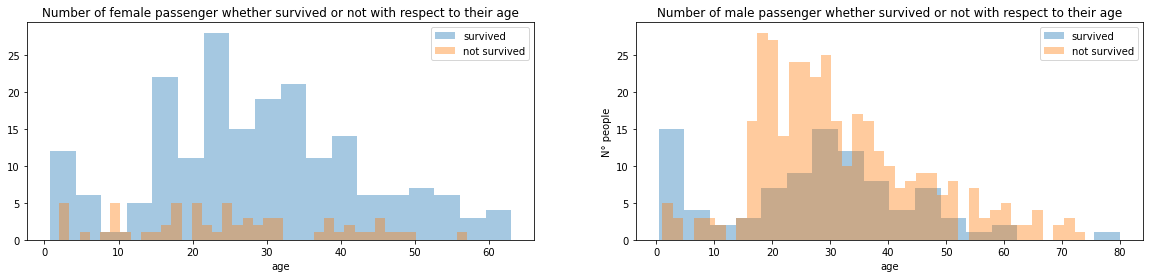

In [ ]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))

women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women[survived]==1].age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Number of female passenger whether survived or not with respect to their age')

ax = sns.distplot(men[men[survived]==1].age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
plt.ylabel('N° people')
ax.set_title('Number of male passenger whether survived or not with respect to their age')

plt.show()

#### 4. Sobrevivientes por Tiquetes

1    0.397661
3    0.347953
2    0.254386
Name: pclass, dtype: float64


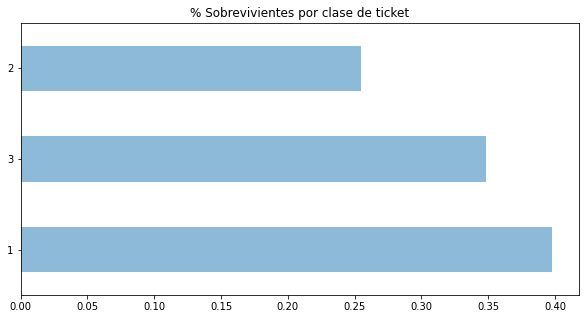

In [ ]:
fig = plt.figure(figsize=(10,5))
datos = titanic.pclass[titanic.survived==1].value_counts(normalize = True)
print(datos)

datos.plot(kind='barh', alpha=0.5)
plt.title('% Sobrevivientes por clase de ticket')
plt.show()

#### 5. Sobrevivientes por Clases

3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64


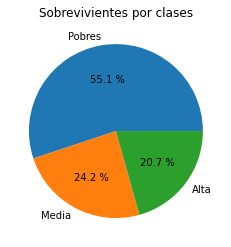

In [ ]:
datos = titanic.pclass.value_counts(normalize=True)
print(datos)

plt.pie(datos,labels=['Pobres','Media','Alta'], autopct='%0.1f %%')
plt.title('Sobrevivientes por clases')
plt.show()

#### 6. Comparación de edad de Sobrevivientes por Clases

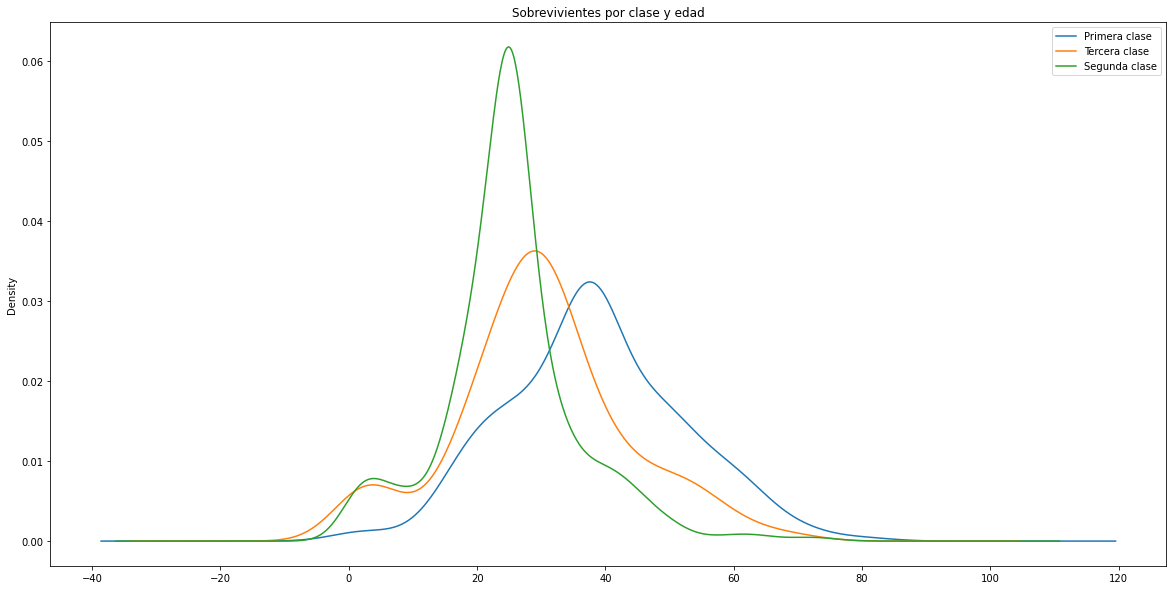

In [ ]:
fig = plt.figure(figsize=(20,10))
for t_class in [1,2,3]:
    titanic.age[titanic.pclass == t_class].plot(kind='kde')
    
plt.legend({'Primera clase', 'Segunda clase', 'Tercera clase'})
plt.title('Sobrevivientes por clase y edad')
plt.show()

### Imputación de datos

In [ ]:
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return titanic[titanic['pclass']==1]['age'].mean()
    elif pclass == 2:
      return titanic[titanic['pclass']==2]['age'].mean()
    elif pclass == 3:
      return titanic[titanic['pclass']==3]['age'].mean()
  else:
    return age

In [ ]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis=1)

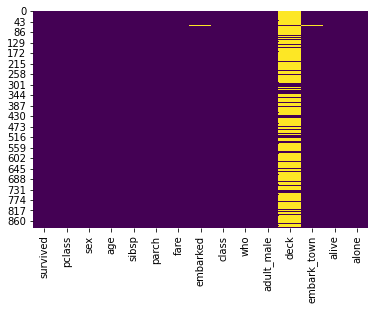

In [ ]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

### Normalización del Dataset

#### 1. Eliminación de columnas "innecesarias"

In [ ]:
titanic.drop(['class','adult_male','who','embarked','deck', 'embark_town', 'alive'], axis=1,inplace=True)
titanic.dropna(inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,male,22.0,1,0,7.2500,False
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,True
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


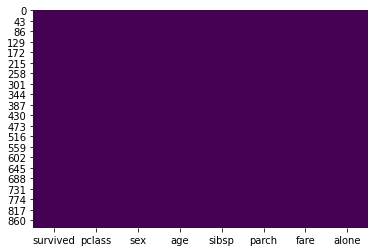

In [ ]:
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis")

#### 2. Conversión de datos categoricos a datos numéricos

La siguiente funcionalidad permite cambiar las palabras por números, pero en orden alfabético

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,1,22.0,1,0,7.2500,False
1,1,1,0,38.0,1,0,71.2833,False
2,1,3,0,26.0,0,0,7.9250,True
3,1,1,0,35.0,1,0,53.1000,False
4,0,3,1,35.0,0,0,8.0500,True


In [ ]:
titanic['alone'] = label_encoder.fit_transform(titanic['alone'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,1


### Separación de datos para el modelo

In [ ]:
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'alone']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo de Árbol de Decisiones

#### 1. Prueba para encontrar la mejor profundidad

In [ ]:
max_depth_lista = list(range(1, 6))

accuracy = []

for depth in max_depth_lista:
  arbol = DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol.fit(X_train, y_train)
  score = arbol.score(X_test, y_test)
  accuracy.append(score)

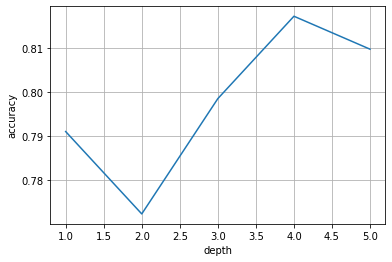

In [ ]:
plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

#### 2. Entrenamiento y presición con la profundidad óptima

In [ ]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=0)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_train_predi = arbol.predict(X_train)
y_test_predi = arbol.predict(X_test)

print('Accuracy of train: %'+ str(accuracy_score(y_train_predi, y_train)))
print('Accuracy of test: %'+ str(accuracy_score(y_test_predi, y_test)))
 
print('Accuracy Global %'+ str(arbol.score(X_test, y_test)))

Accuracy of train: %0.8314606741573034
Accuracy of test: %0.8171641791044776
Accuracy Global %0.8171641791044776


#### 3. Gráfica del modelo de árbol por nodos

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

class_name_list= list(['dead','live'])
dot_data= export_graphviz(arbol, feature_names=['pclass','sex','age','sibsp','parch', 'alone'], class_names=class_name_list)
graphic= graph_from_dot_data(dot_data)
graphic.write_png("arbol_titanic.png")

True

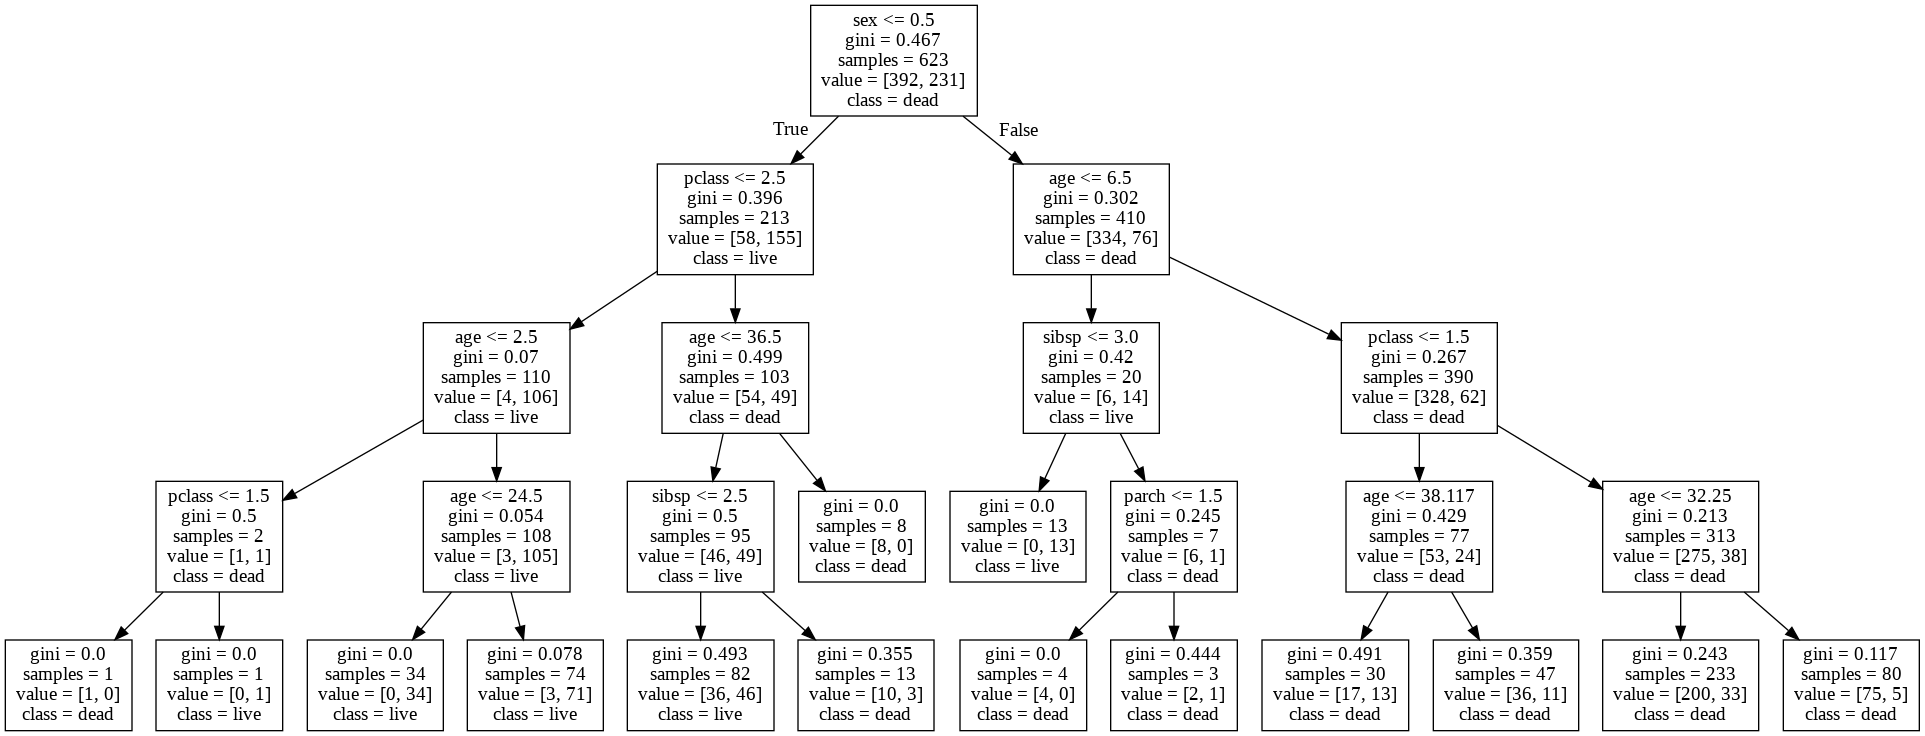

### Classification_report()

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test, y_test_predi))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.70      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268

